In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.compose import ColumnTransformer

In [10]:
df = pd.read_csv('titanic_custom_100rows.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,30.3,95.8961
1,1,18.0,69.2931
2,0,37.9,50.8395
3,0,34.3,51.8374
4,0,19.0,12.9120


In [11]:
df.isnull().sum()

Survived     0
Age         10
Fare         0
dtype: int64

In [12]:
df.shape

(100, 3)

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [24]:
 x = df.iloc[ : , 1 : ]
 y = df.iloc[ : , 0]

In [25]:
 x_train, x_test, y_train, y_test = train_test_split(
     x,
     y,
     test_size=0.2, 
     random_state=42
 )

In [26]:
clf = DecisionTreeClassifier() 

In [27]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [28]:
accuracy_score(y_test, y_pred)

0.5555555555555556

In [29]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'))

np.float64(0.5333333333333334)

In [42]:
# Discretizer ...............................................
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [43]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]), 
    ('second', kbin_fare, [1])
])

In [44]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [45]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [46]:
trf.named_transformers_['first'].n_bins_

array([10])

In [47]:
trf.named_transformers_['first'].bin_edges_

array([array([10.6 , 16.71, 21.02, 23.23, 27.5 , 30.65, 34.42, 36.1 , 38.66,
              41.7 , 60.6 ])                                                ],
      dtype=object)

In [48]:
trf.named_transformers_['second'].bin_edges_

array([array([10.3078 , 25.24797, 29.21888, 36.52811, 43.2104 , 51.33845,
              61.42874, 71.91327, 84.2423 , 92.27932, 99.6135 ])         ],
      dtype=object)

In [52]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    x_trf = trf.fit_transform(x) 
    print(np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before') 

    plt.subplot(122)
    plt.hist(x_trf[: , 0], color='red')
    plt.title('After') 

    plt.show()

0.5444444444444445


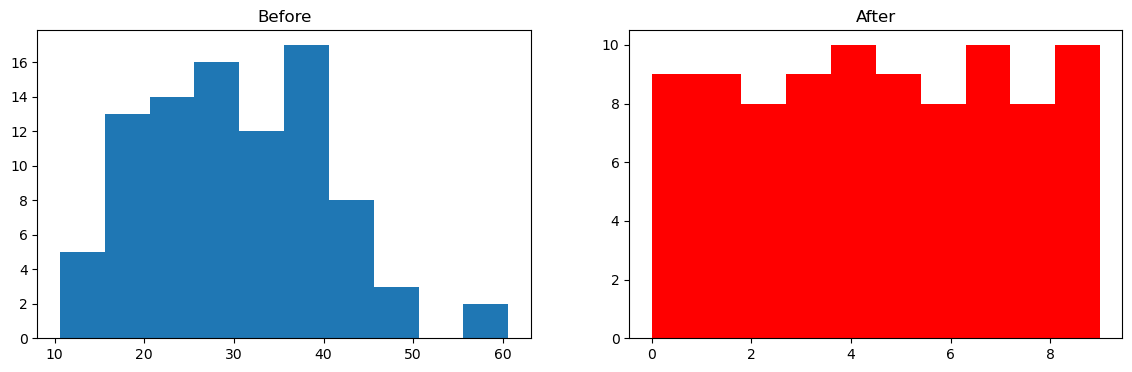

In [53]:
discretize(10, 'quantile')